In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import re

get_ipython().run_line_magic('matplotlib', 'inline')
get_ipython().run_line_magic('config', "InlineBackend.figure_format ='retina'")
sns.set()


df = pd.read_csv('2017-18_AdvancedStats_Salary.csv')


df.columns

df['New_Salary'] = df['Salary'].replace('[/$,]',"",regex=True).astype(float)

df = df.rename(columns = {'Slar':'Salary'})

df

,Player,NBA_Country,NBA_DraftNumber,Salary,Signed Using,Guaranteed,Pos,Age,Tm,G,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,New_Salary
0,Zhou Qi,China,43,"$815,615.00",MLE,"$815,615.00",C,22,HOU,16,...,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,815615.0
1,Zaza Pachulia,Georgia,42,"$3,477,600.00",NaN,"$3,477,600.00",C,33,GSW,66,...,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,3477600.0
2,Zach Randolph,USA,19,"$12,307,692.00",Cap space,"$24,000,000.00",PF,36,SAC,59,...,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,12307692.0
3,Zach LaVine,USA,13,"$3,202,217.00",1st Round Pick,"$3,202,217.00",SG,22,CHI,24,...,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,3202217.0
4,Zach Collins,USA,10,"$3,057,240.00",1st Round Pick,"$6,686,160.00",C,20,POR,62,...,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,3057240.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Adreian Payne,USA,15,$0.00,NaN,$0.00,PF,26,ORL,5,...,15.0,0.1,0.0,0.2,0.204,0.1,-4.1,-4.0,0.0,0.0
647,Abdel Nader,Egypt,58,"$1,167,333.00",NaN,"$1,617,333.00",SF,24,BOS,44,...,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3,1167333.0
648,Aaron Harrison,USA,62,"$83,129.00",NaN,$0.00,SG,23,DAL,7,...,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0,83129.0
649,Aaron Gordon,USA,4,"$5,504,420.00",1st Round Pick,"$5,504,420.00",PF,22,ORL,55,...,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,1.0,5504420.0


In [2]:
def get_target(value):
    if value > 3000000:
        return 1
    else:
        return 0

In [3]:
df['target'] = df['New_Salary'].apply(lambda x: get_target(x))

Text(0, 0.5, 'sample size')

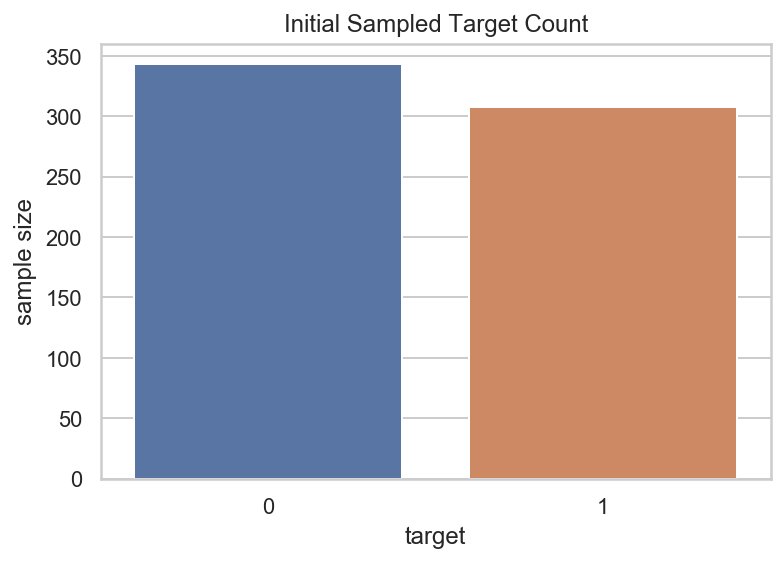

In [4]:
sns.set(style="whitegrid")
ax = sns.countplot(x="target", data=df)
                 
ax.set_title('Initial Sampled Target Count')
ax.set_ylabel('sample size')

In [5]:
df_train = df.select_dtypes(exclude=['object']).dropna()

#Sort columns to be alphabetical order

df_train = df_train.reindex(sorted(df_train.columns), axis=1)


In [6]:
#Structure
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import StratifiedKFold as KFold
from yellowbrick.model_selection import CVScores


#Kernal
from sklearn.gaussian_process.kernels import RBF


#Classifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Transform
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler,MinMaxScaler
from sklearn.decomposition import FastICA
from sklearn import preprocessing

#Reports
from yellowbrick.classifier import confusion_matrix,classification_report,DiscriminationThreshold

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)







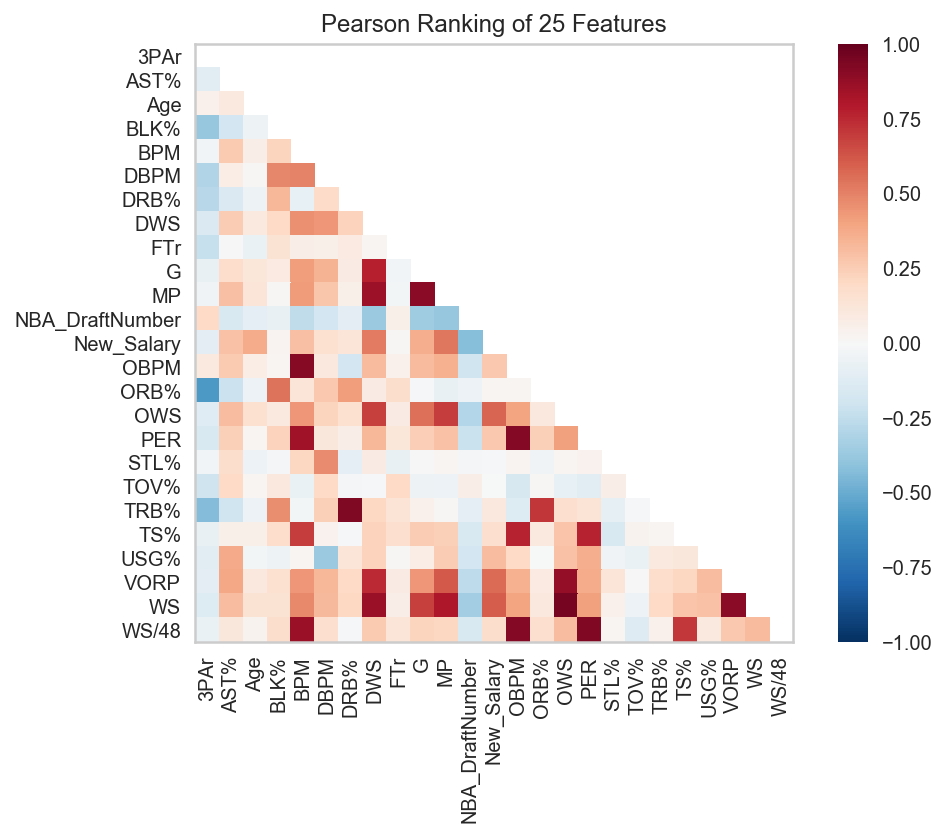

In [7]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_train, y_train)           # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()              # Finalize and render the figure

Pipeline(steps=[('std', StandardScaler()), ('reg', LogisticRegression())])


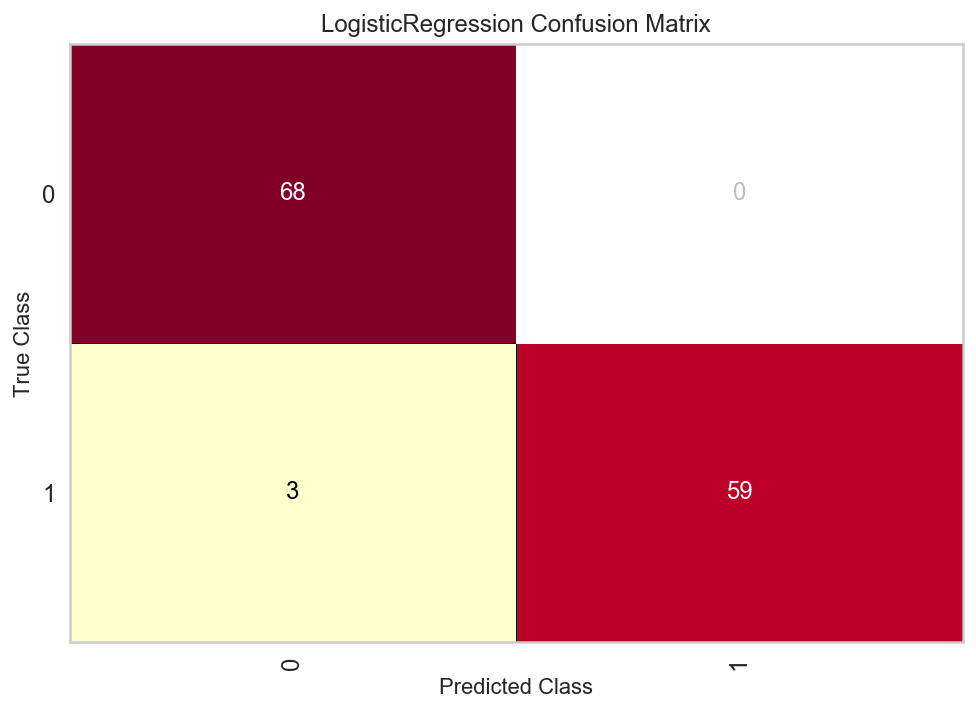

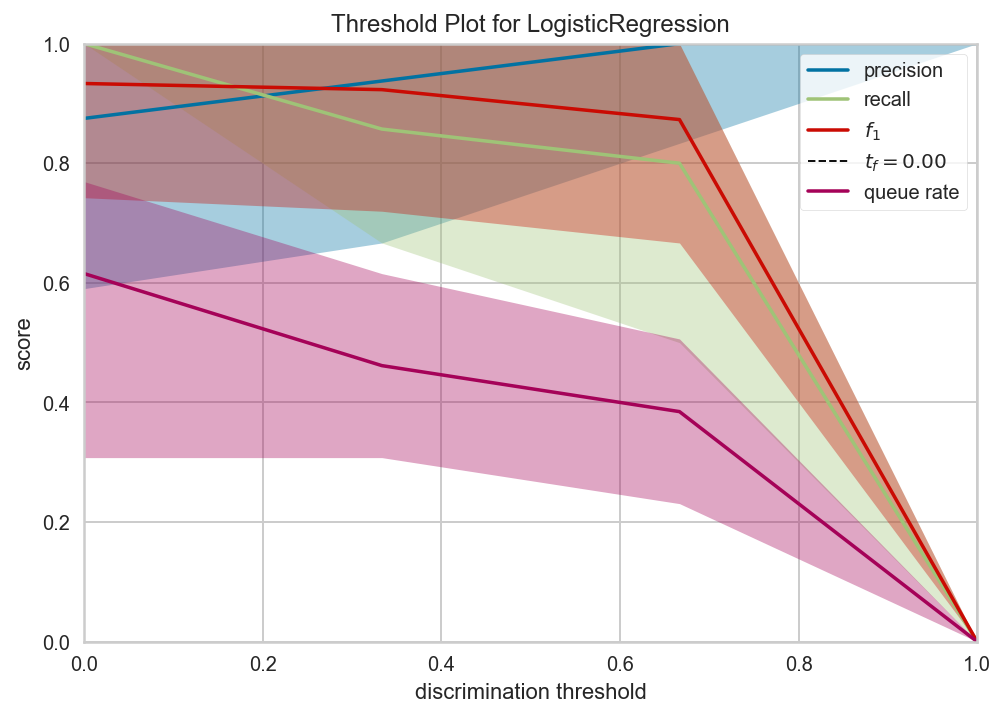

Test CV Score = 0.9230769230769231
Pipeline(steps=[('std', StandardScaler()), ('mlp', MLPClassifier())])


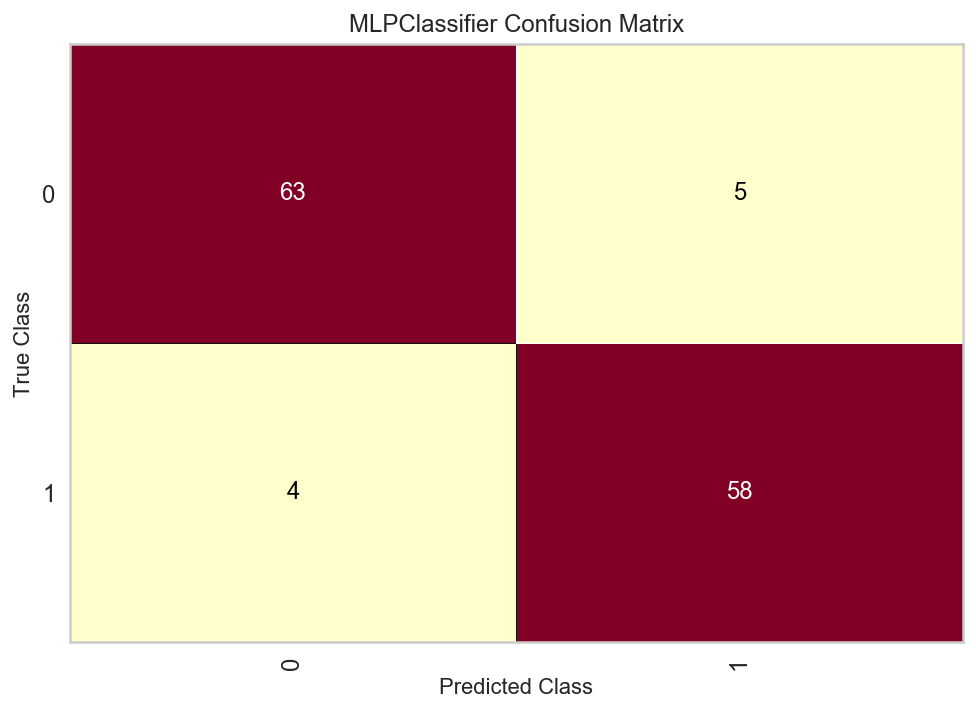

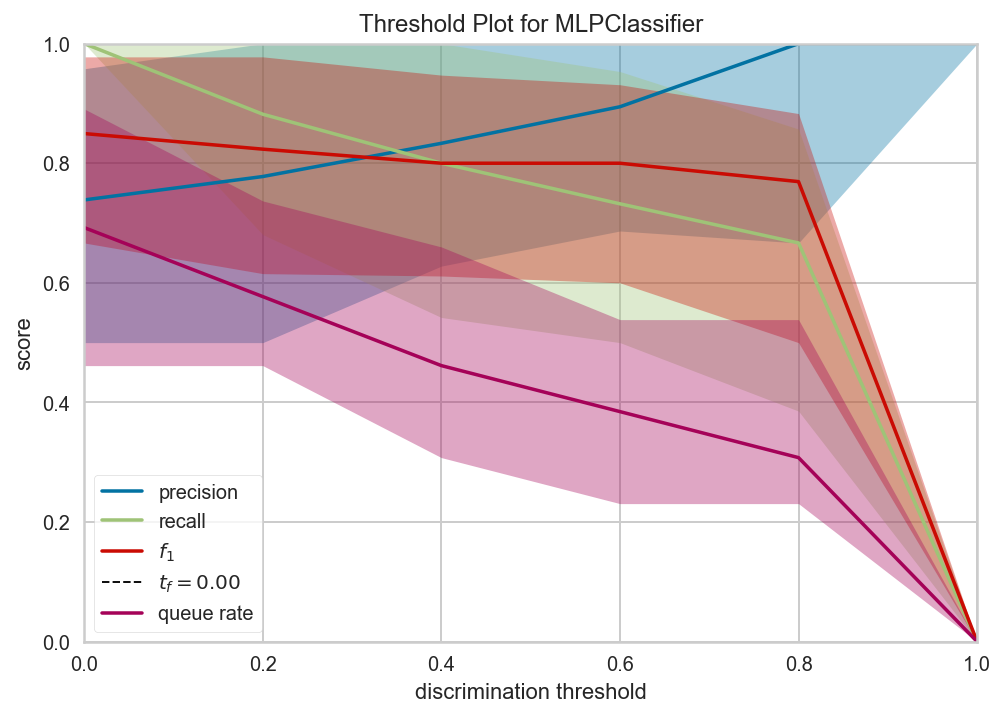

Test CV Score = 0.9230769230769231
Pipeline(steps=[('std', StandardScaler()), ('rfc', RandomForestClassifier())])


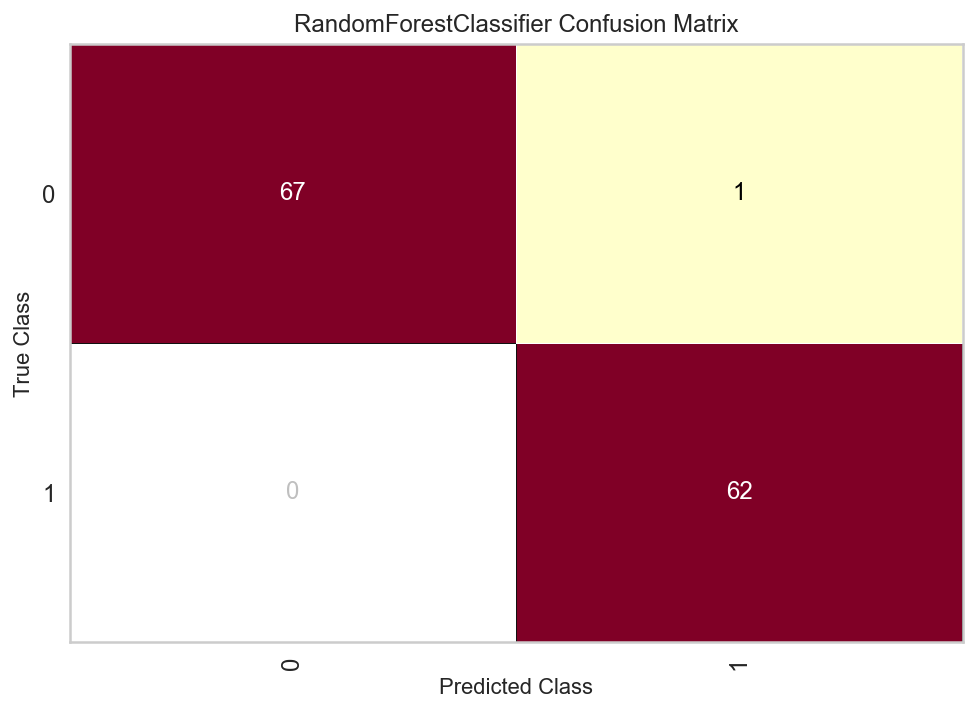

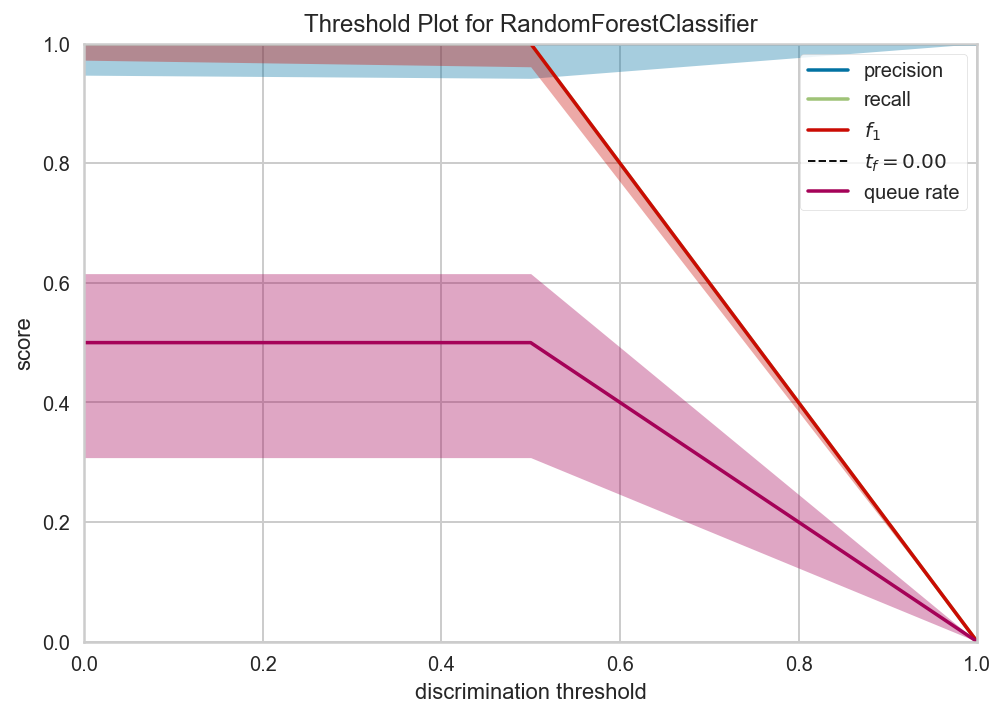

Test CV Score = 1.0
Pipeline(steps=[('std', StandardScaler()), ('reg', AdaBoostClassifier())])


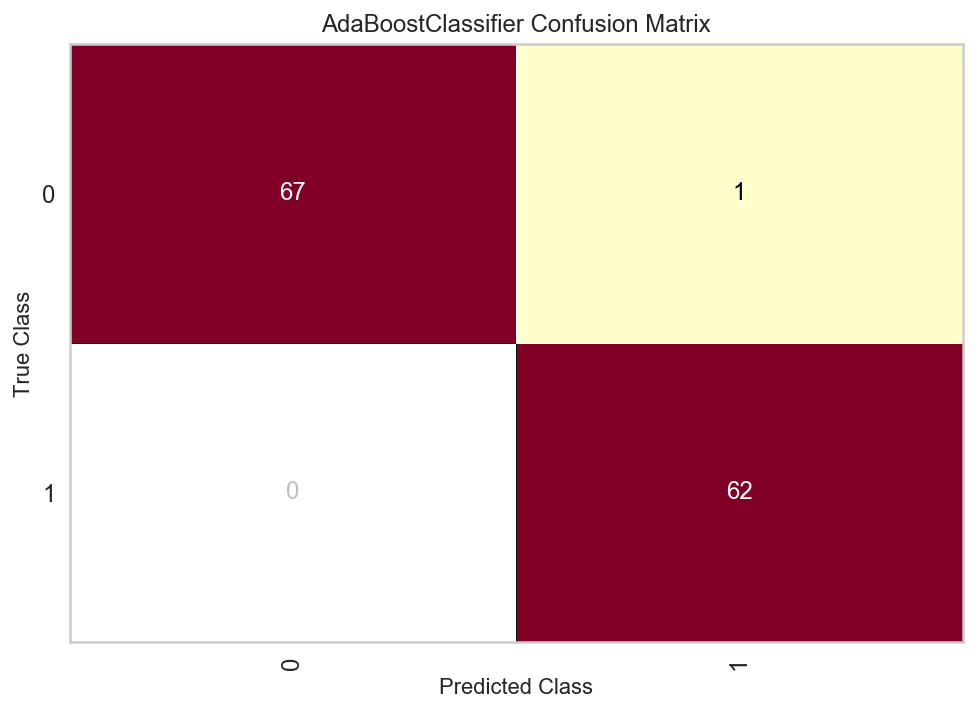

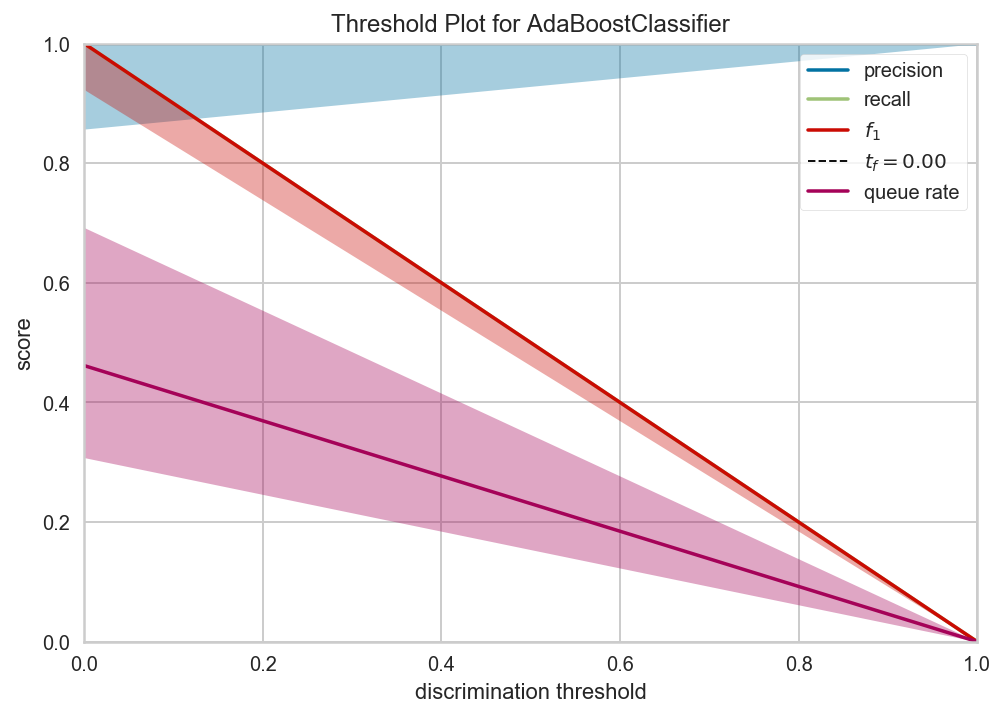

Test CV Score = 0.9615384615384616
Pipeline(steps=[('std', StandardScaler()), ('reg', KNeighborsClassifier())])


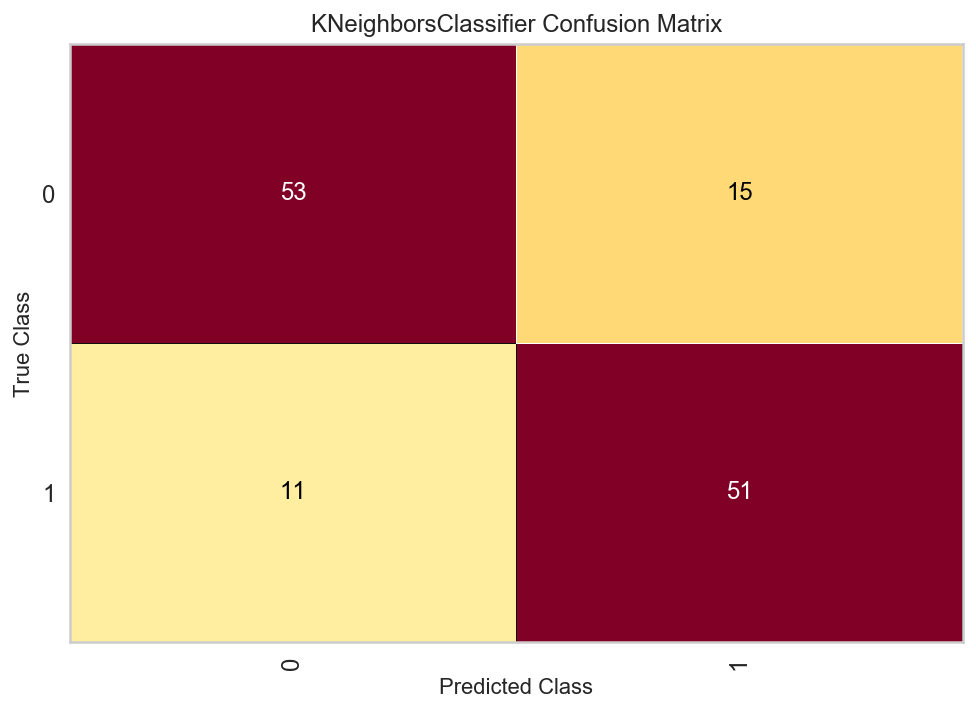

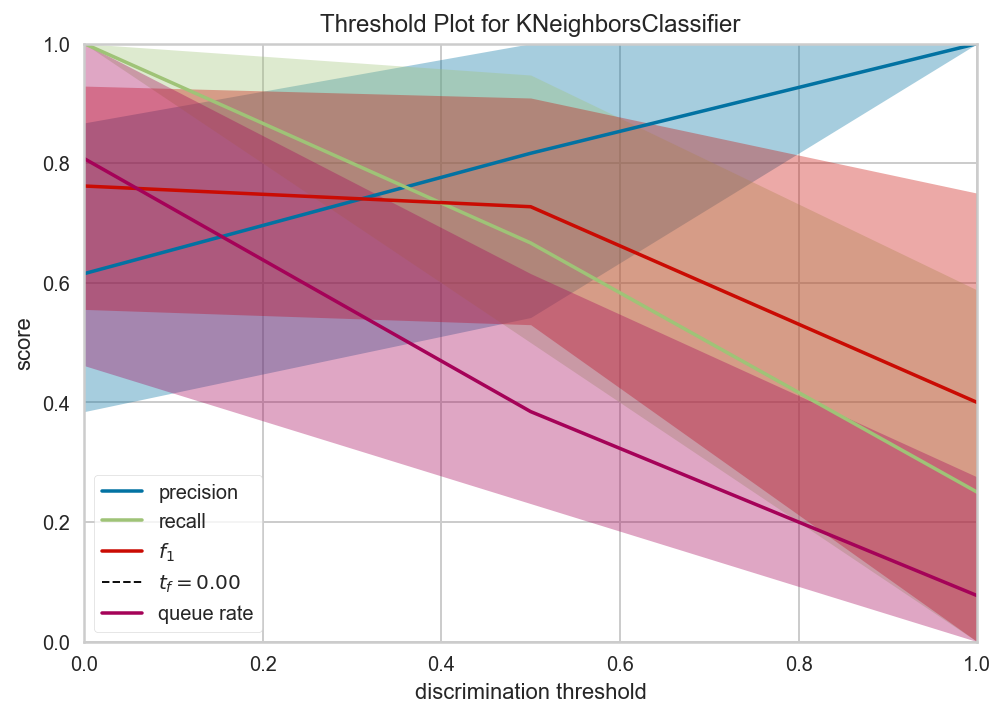

Test CV Score = 0.8076923076923077
Pipeline(steps=[('std', StandardScaler()),
                ('gbc', GradientBoostingClassifier())])


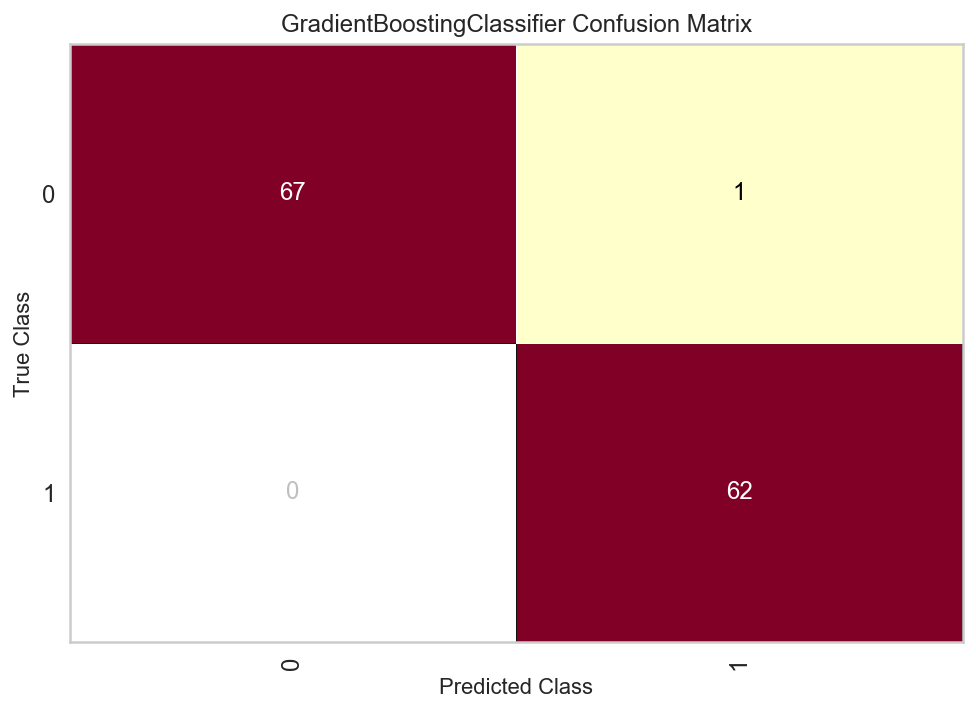

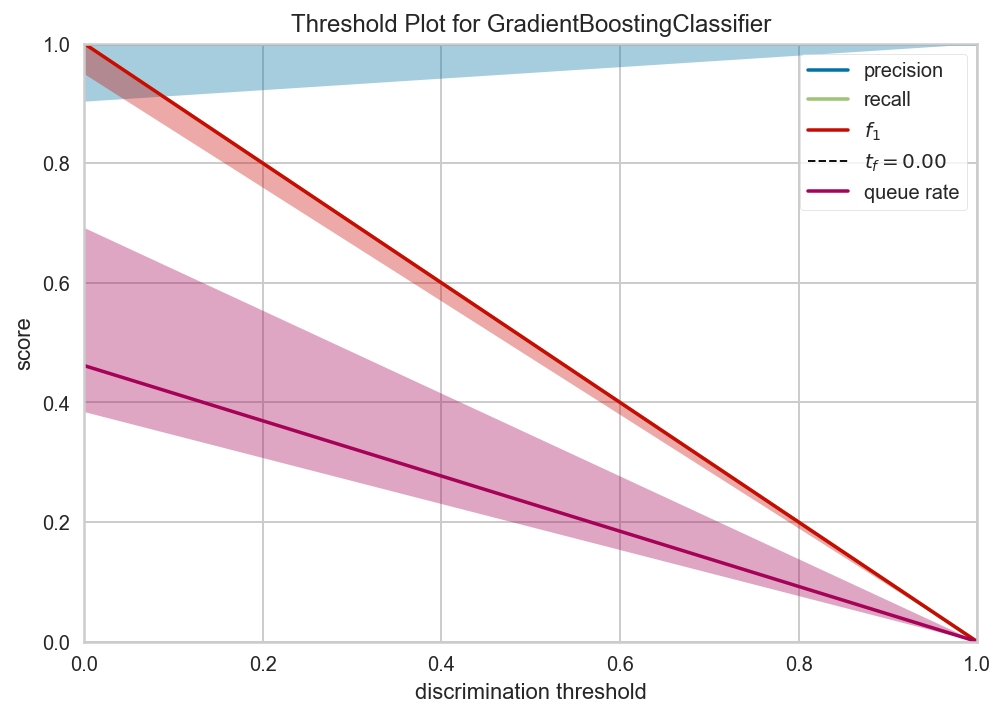

Test CV Score = 0.9615384615384616


In [8]:
scaler = [StandardScaler(), RobustScaler(), MaxAbsScaler(),MinMaxScaler()]

models = [
    #Standard Scaler,QuantileTransformer random_state=0
    
    
    
    #C=0.01,penalty='l1',solver='liblinear')
    
    Pipeline([
            ('std',StandardScaler()),
            ('reg',LogisticRegression())
    ]),

    Pipeline([
            ('std',StandardScaler()),
            ('mlp',MLPClassifier())
    ]),

    #Does identify positive more than comparison
    Pipeline([
            ('std',StandardScaler()),
            ('rfc',RandomForestClassifier())
    ]),

    #Too many false positives and negatives    
    Pipeline([
            ('std',StandardScaler()),
            ('reg',AdaBoostClassifier())
    ]),
    #Robust Scaler leads to false positives above 3000


    #Above 3000 for both false positives
    Pipeline([
        ('std',StandardScaler()),
        ('reg',KNeighborsClassifier())
    ]),

    #learning_rate= 0.3, loss='deviance')
     Pipeline([
            ('std',StandardScaler()),
            ('gbc',GradientBoostingClassifier())
    ]),

]


before = []

for model in models:
    print(model)
    model.fit(X_train,y_train)
    _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
    visualizer = DiscriminationThreshold(model)
    visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
    visualizer.show()  
    

    
    y_pred = model.predict(X_train)
    model_str = str(model[1])
    model_name = model_str[0:model_str.find('(',0)].strip()
    
    
    
    #print('Train CV Score = {x} '.format(x=cvs(model,X_train,y_train)[3]))
    print("Test CV Score = {x}".format(x=cvs(model,X_test,y_test)[3]))
    
    
    
    
    before.append({'Model':model[1],'Transformer':model[0],
              'Test Model Score':cvs(model,X_test,y_test)[3],
              'F1 Score':f1_score(y_train,y_pred),'Precision Score':precision_score(y_train,y_pred),
              'Recall Score':recall_score(y_train,y_pred)})




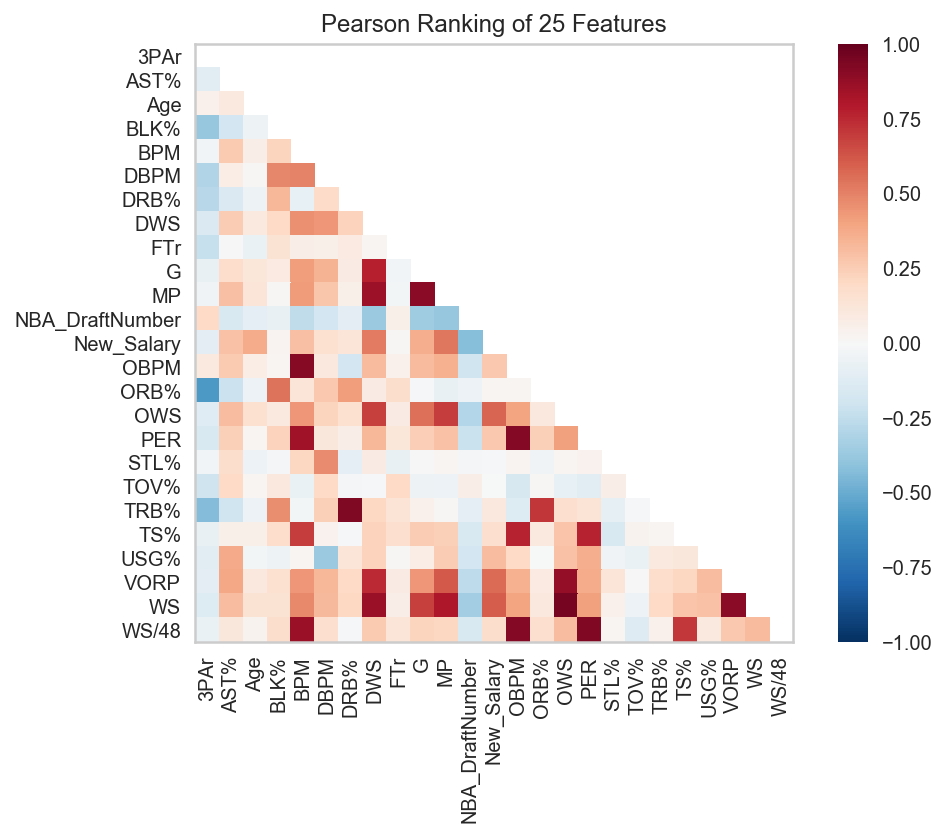

In [9]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_train, y_train)           # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [10]:
#Sort columns to be alphabetical order

df_train = df_train.reindex(sorted(df_train.columns), axis=1)


In [11]:
df_train = df_train.drop(columns=['G','WS','DWS','MP'])

In [12]:
#Structure
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import StratifiedKFold as KFold
from yellowbrick.model_selection import CVScores


#Kernal
from sklearn.gaussian_process.kernels import RBF


#Classifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Transform
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler,MinMaxScaler
from sklearn.decomposition import FastICA
from sklearn import preprocessing

#Reports
from yellowbrick.classifier import confusion_matrix,classification_report,DiscriminationThreshold

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)







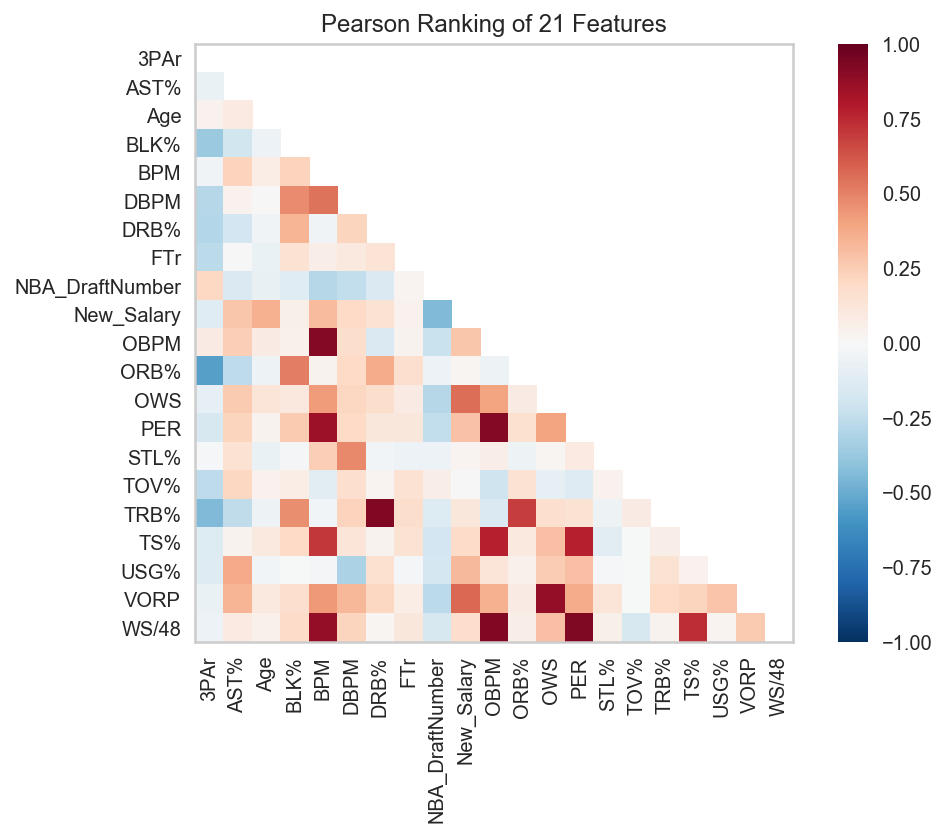

In [13]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_train, y_train)           # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()              # Finalize and render the figure

Pipeline(steps=[('std', StandardScaler()), ('reg', LogisticRegression())])


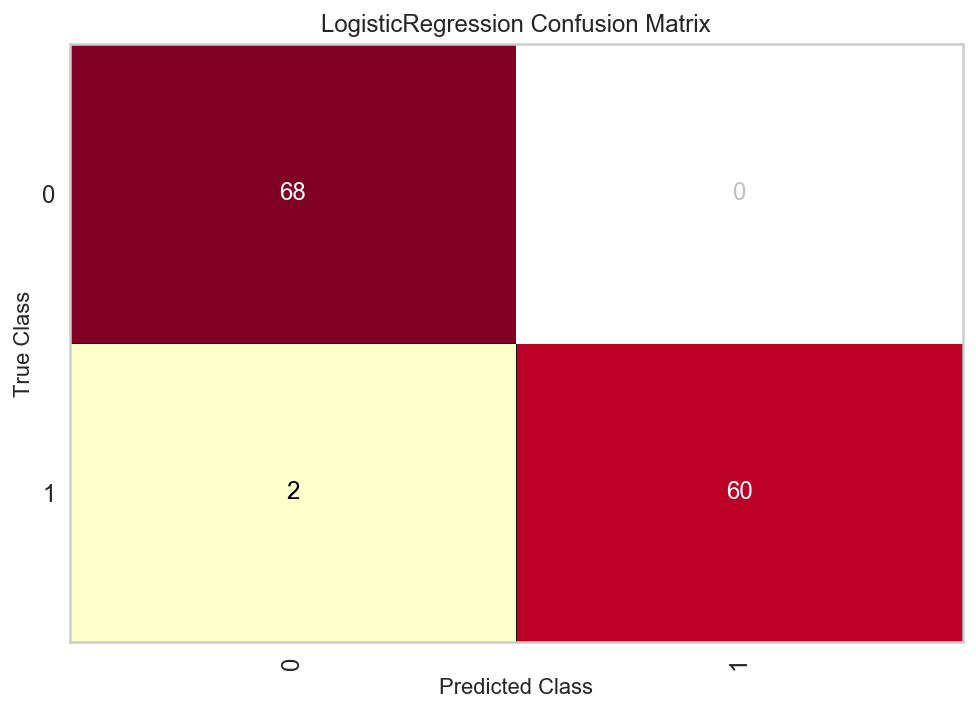

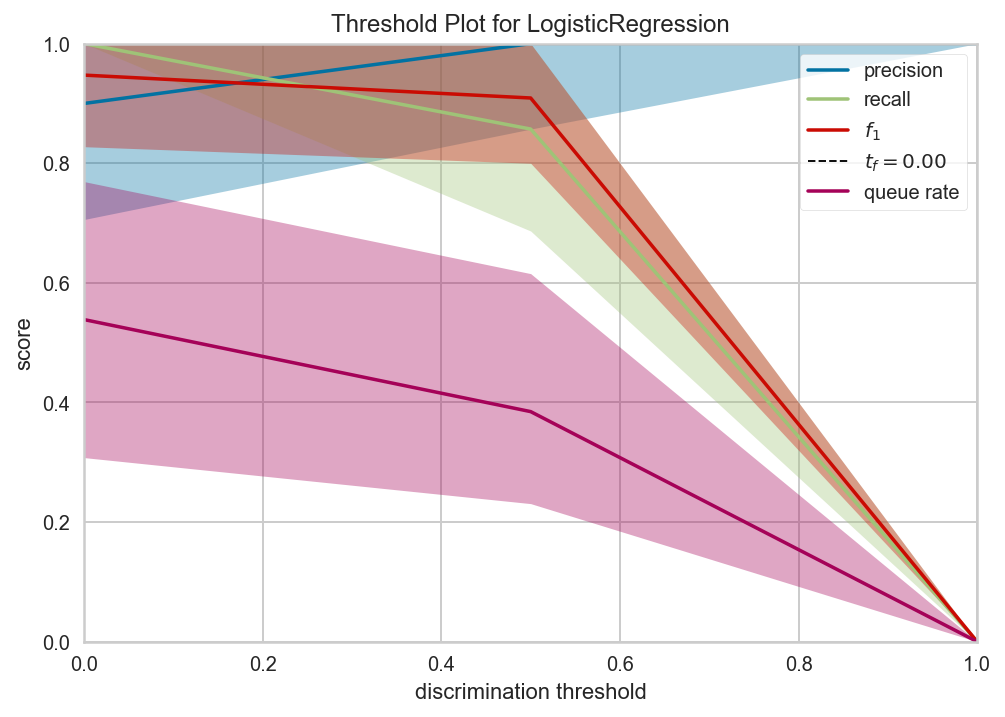

Test CV Score = 0.8846153846153846
Pipeline(steps=[('std', StandardScaler()), ('mlp', MLPClassifier())])


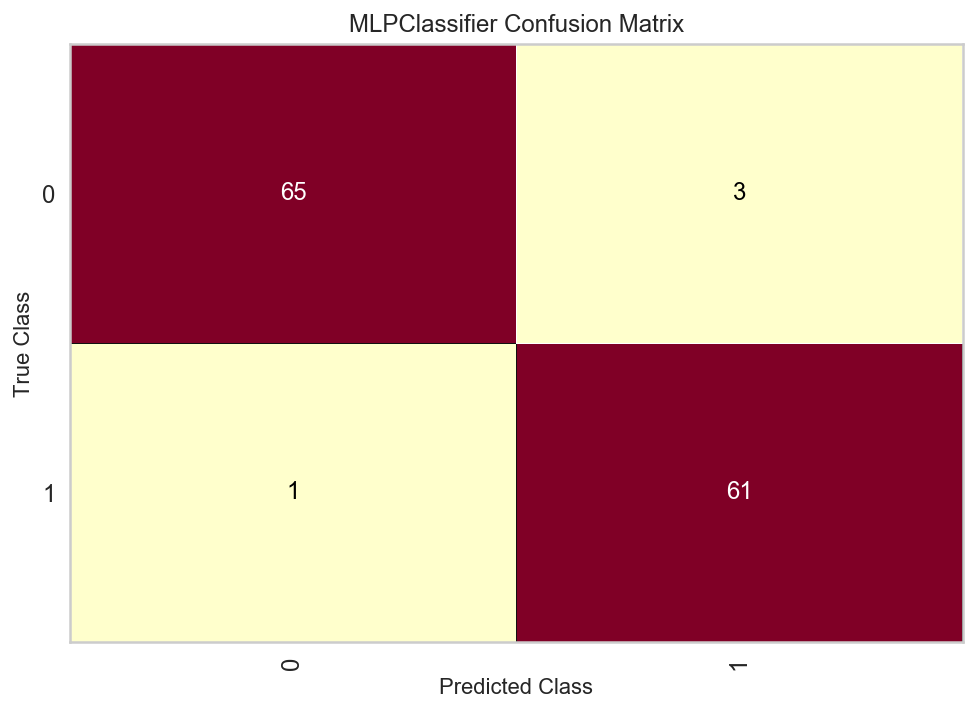

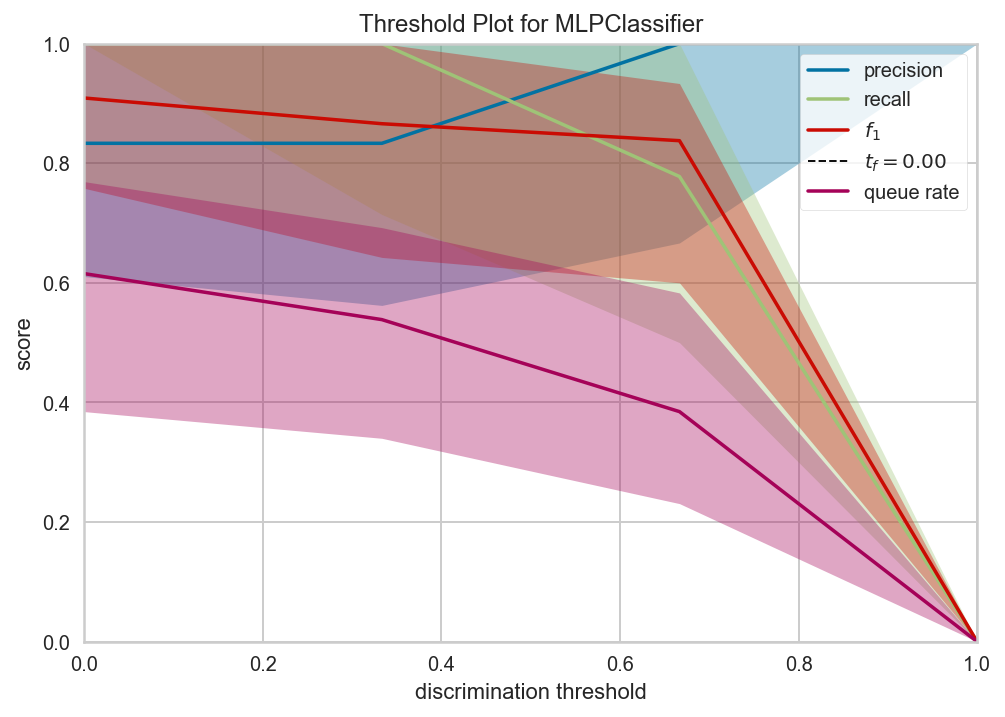

Test CV Score = 0.7692307692307693
Pipeline(steps=[('std', StandardScaler()), ('rfc', RandomForestClassifier())])


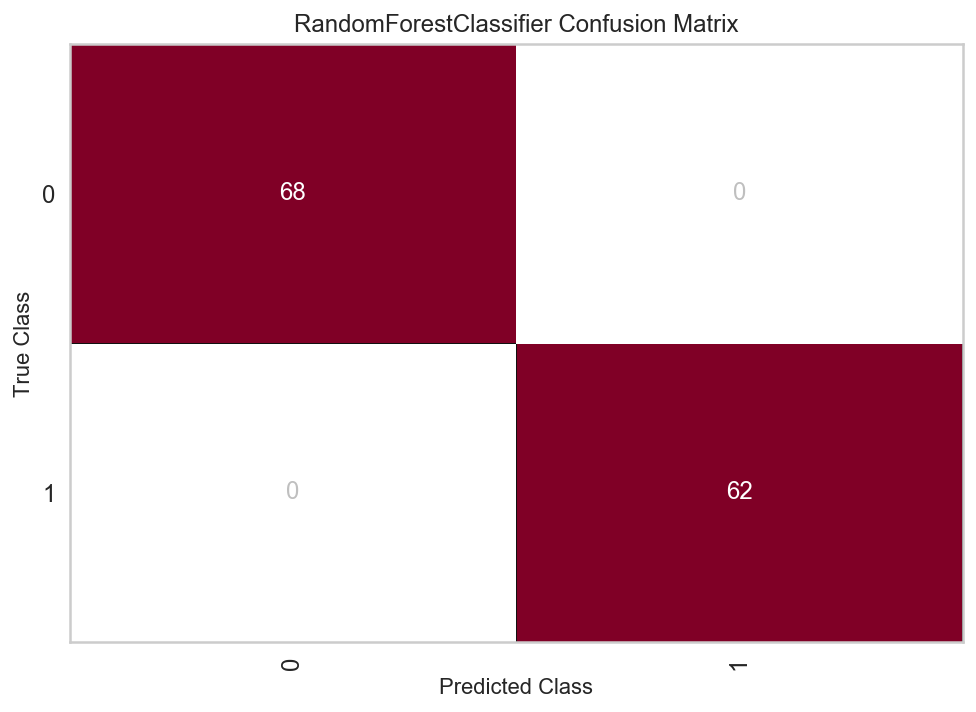

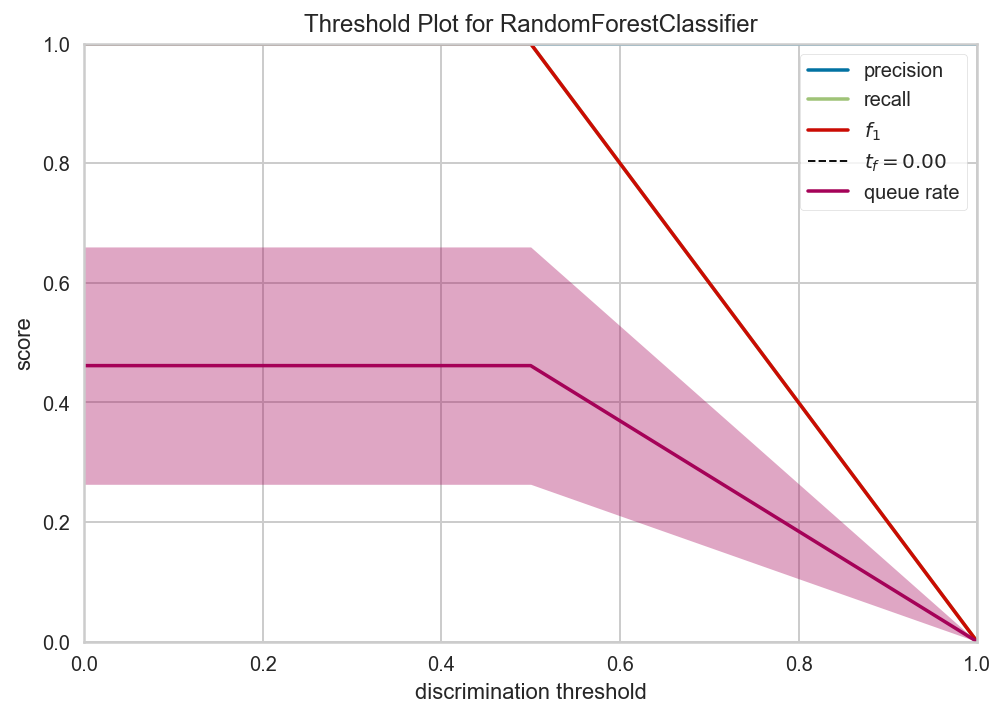

Test CV Score = 1.0
Pipeline(steps=[('std', StandardScaler()), ('reg', KNeighborsClassifier())])


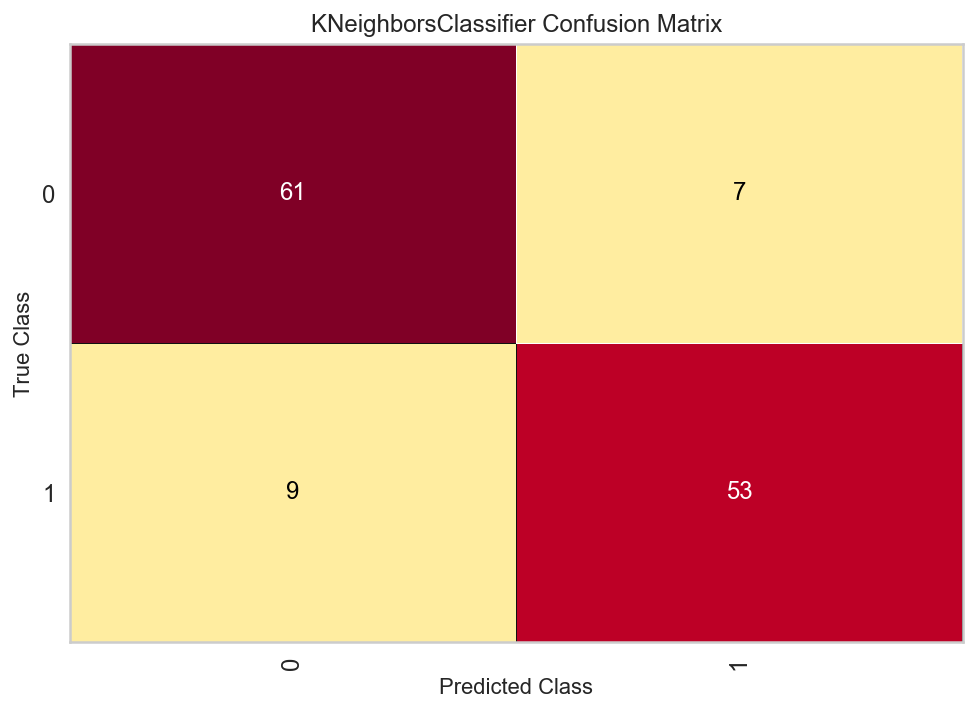

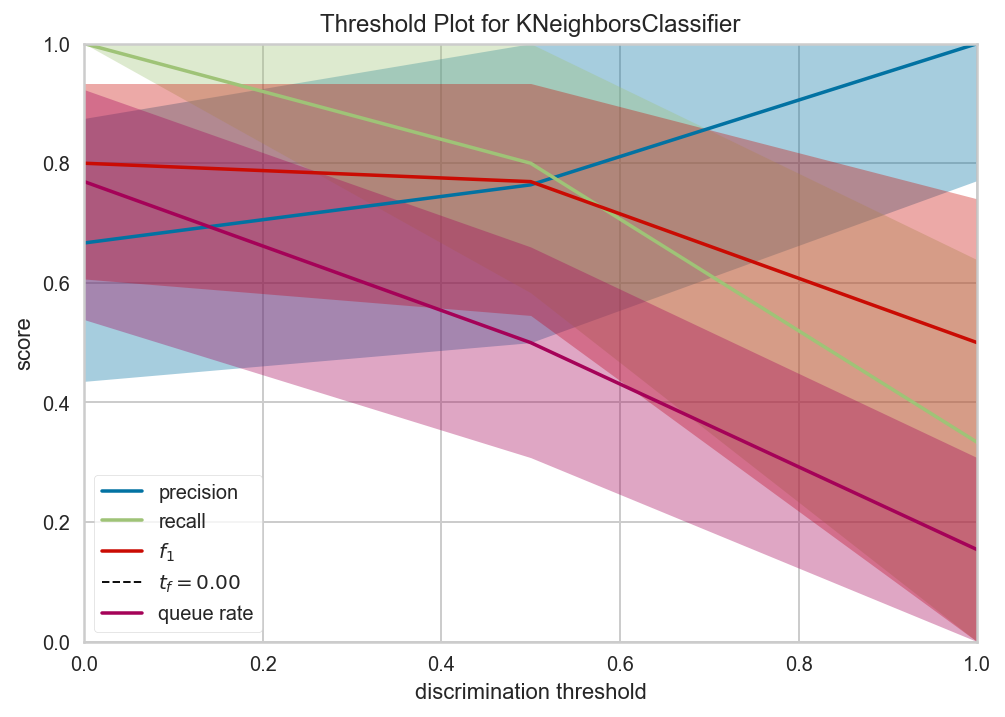

Test CV Score = 0.6923076923076923


In [14]:
scaler = [StandardScaler(), RobustScaler(), MaxAbsScaler(),MinMaxScaler()]

models = [
    #Standard Scaler,QuantileTransformer random_state=0
    
    
    
    #C=0.01,penalty='l1',solver='liblinear')
    
    Pipeline([
            ('std',StandardScaler()),
            ('reg',LogisticRegression())
    ]),

    Pipeline([
            ('std',StandardScaler()),
            ('mlp',MLPClassifier())
    ]),

    #Does identify positive more than comparison
    Pipeline([
            ('std',StandardScaler()),
            ('rfc',RandomForestClassifier())
    ]),


    #Above 3000 for both false positives
    Pipeline([
        ('std',StandardScaler()),
        ('reg',KNeighborsClassifier())
    ]),


]


after = []

for model in models:
    print(model)
    model.fit(X_train,y_train)
    _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
    visualizer = DiscriminationThreshold(model)
    visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
    visualizer.show()  
    

    
    y_pred = model.predict(X_train)
    model_str = str(model[1])
    model_name = model_str[0:model_str.find('(',0)].strip()
    
    
    
    #print('Train CV Score = {x} '.format(x=cvs(model,X_train,y_train)[3]))
    print("Test CV Score = {x}".format(x=cvs(model,X_test,y_test)[3]))
    
    
    
    
    after.append({'Model':model[1],'Transformer':model[0],
              'Test Model Score':cvs(model,X_test,y_test)[3],
              'F1 Score':f1_score(y_train,y_pred),'Precision Score':precision_score(y_train,y_pred),
              'Recall Score':recall_score(y_train,y_pred)})




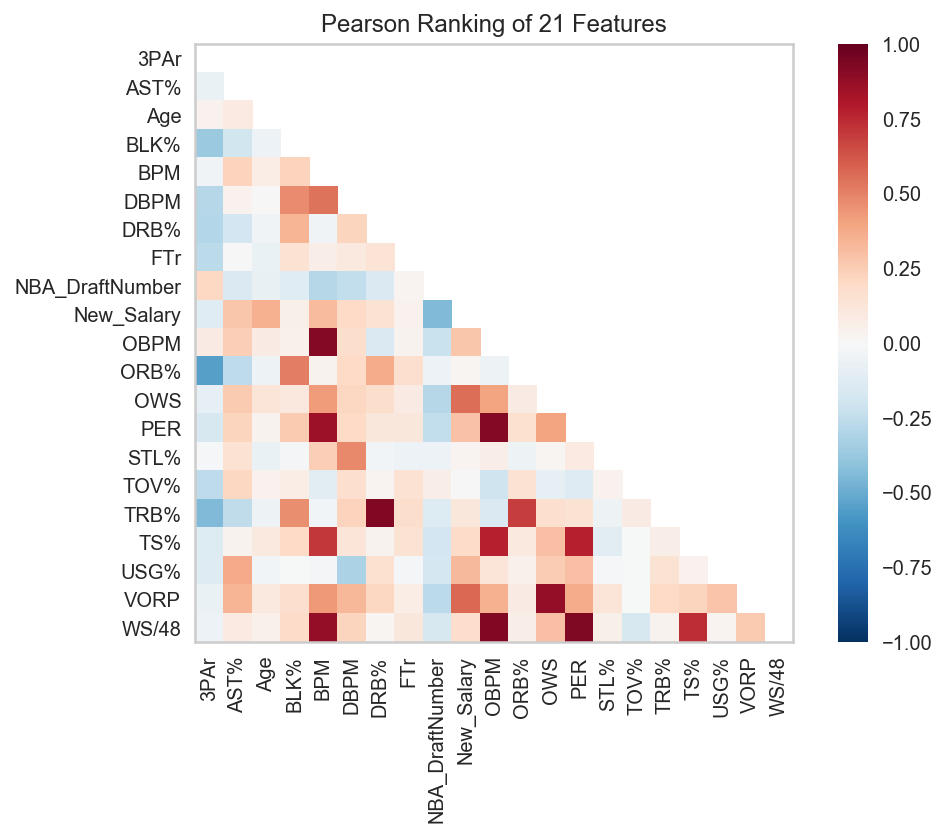

In [17]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_train, y_train)           # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()              # Finalize and render the figure

In [15]:
pd.DataFrame(before)

,Model,Transformer,Test Model Score,F1 Score,Precision Score,Recall Score
0,LogisticRegression(),StandardScaler(),0.923077,0.975309,0.987500,0.963415
1,MLPClassifier(),StandardScaler(),0.884615,0.997963,1.000000,0.995935
2,"(DecisionTreeClassifier(max_features='auto', r...",StandardScaler(),1.000000,1.000000,1.000000,1.000000
3,"(DecisionTreeClassifier(max_depth=1, random_st...",StandardScaler(),0.961538,1.000000,1.000000,1.000000
4,KNeighborsClassifier(),StandardScaler(),0.807692,0.890722,0.903766,0.878049
5,([DecisionTreeRegressor(criterion='friedman_ms...,StandardScaler(),0.961538,1.000000,1.000000,1.000000


In [16]:
pd.DataFrame(after)

,Model,Transformer,Test Model Score,F1 Score,Precision Score,Recall Score
0,LogisticRegression(),StandardScaler(),0.884615,0.972860,1.000000,0.947154
1,MLPClassifier(),StandardScaler(),0.807692,0.993915,0.991903,0.995935
2,"(DecisionTreeClassifier(max_features='auto', r...",StandardScaler(),0.961538,1.000000,1.000000,1.000000
3,KNeighborsClassifier(),StandardScaler(),0.692308,0.899384,0.908714,0.890244


In [19]:
df_train = df_train.drop(columns=['TRB%','BPM','PER','VORP'])

In [20]:
#Structure
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import StratifiedKFold as KFold
from yellowbrick.model_selection import CVScores


#Kernal
from sklearn.gaussian_process.kernels import RBF


#Classifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#Transform
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler,MinMaxScaler
from sklearn.decomposition import FastICA
from sklearn import preprocessing

#Reports
from yellowbrick.classifier import confusion_matrix,classification_report,DiscriminationThreshold

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score


X = df_train[[col for col in df_train.columns if col != 'target']]

y = df_train['target']

X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)







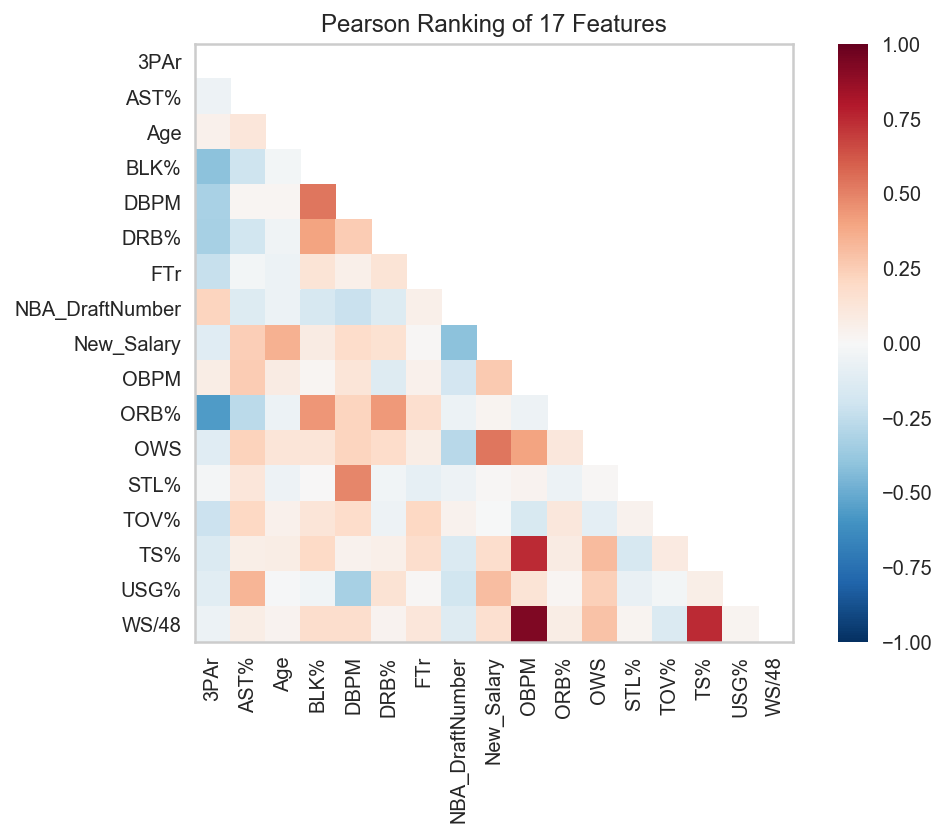

In [21]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X_train, y_train)           # Fit the data to the visualizer
visualizer.transform(X_train)        # Transform the data
visualizer.show()              # Finalize and render the figure

Pipeline(steps=[('std', StandardScaler()), ('mlp', MLPClassifier())])


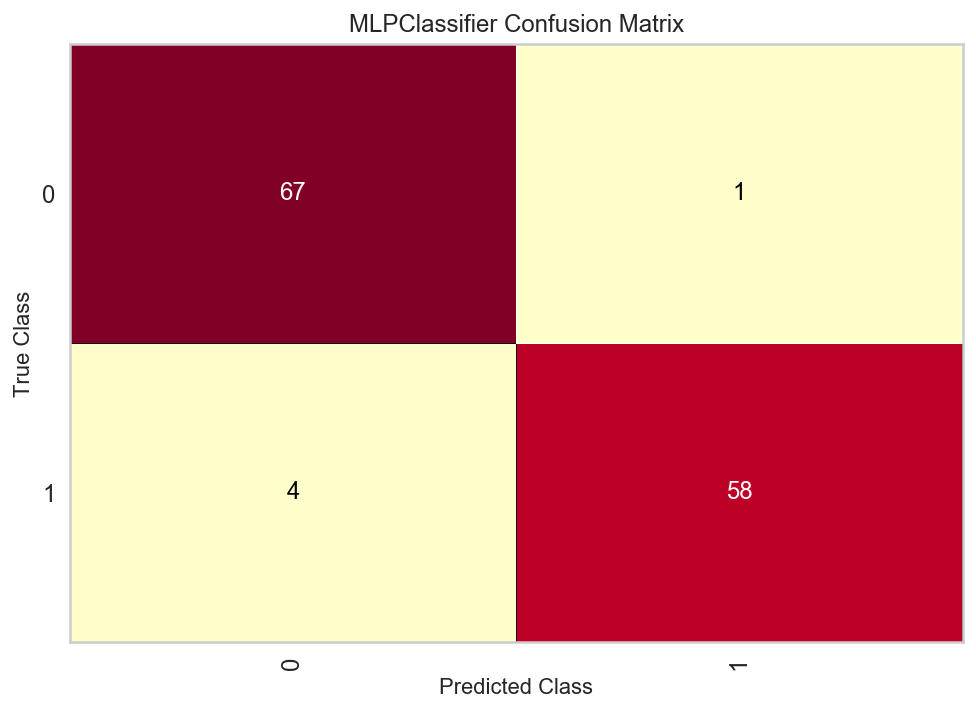

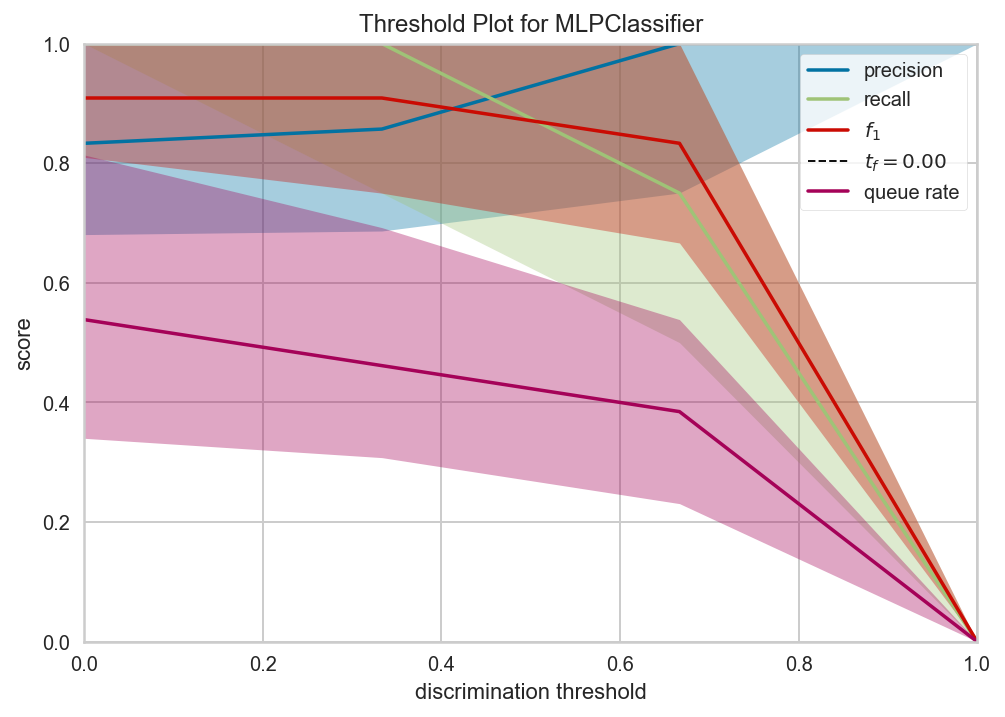

Test CV Score = 0.9230769230769231
Pipeline(steps=[('std', StandardScaler()), ('rfc', RandomForestClassifier())])


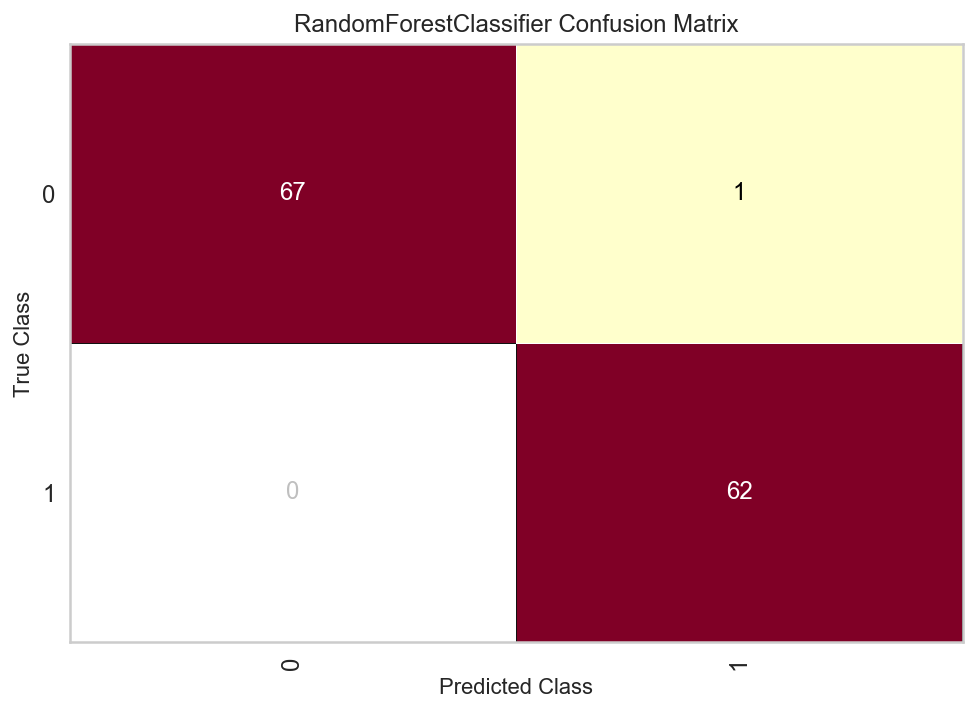

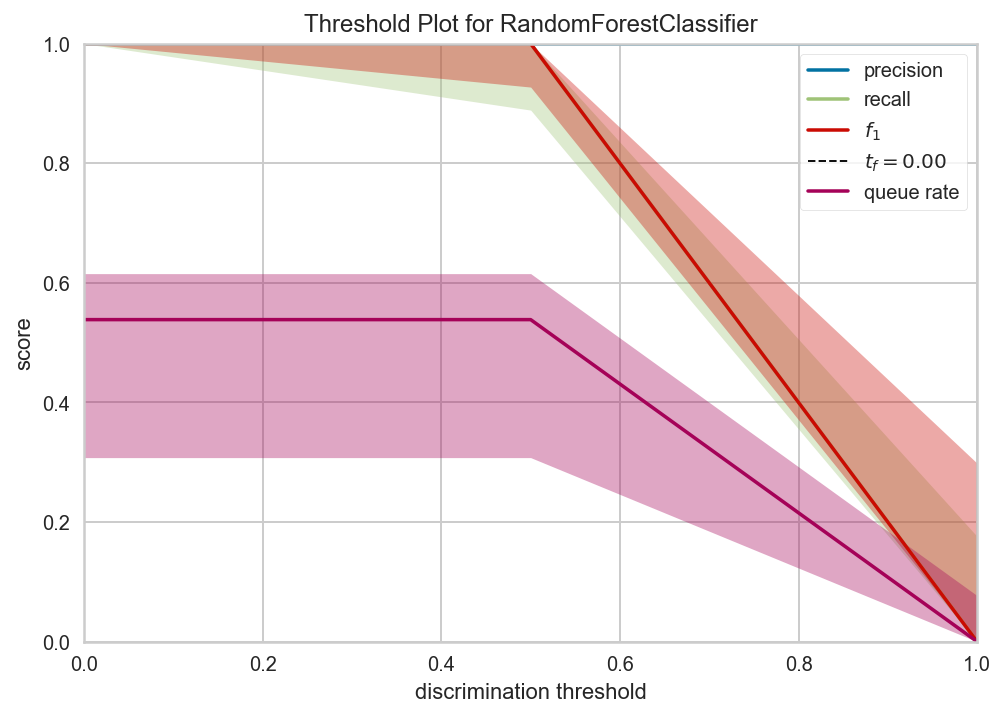

Test CV Score = 1.0
Pipeline(steps=[('std', StandardScaler()), ('reg', KNeighborsClassifier())])


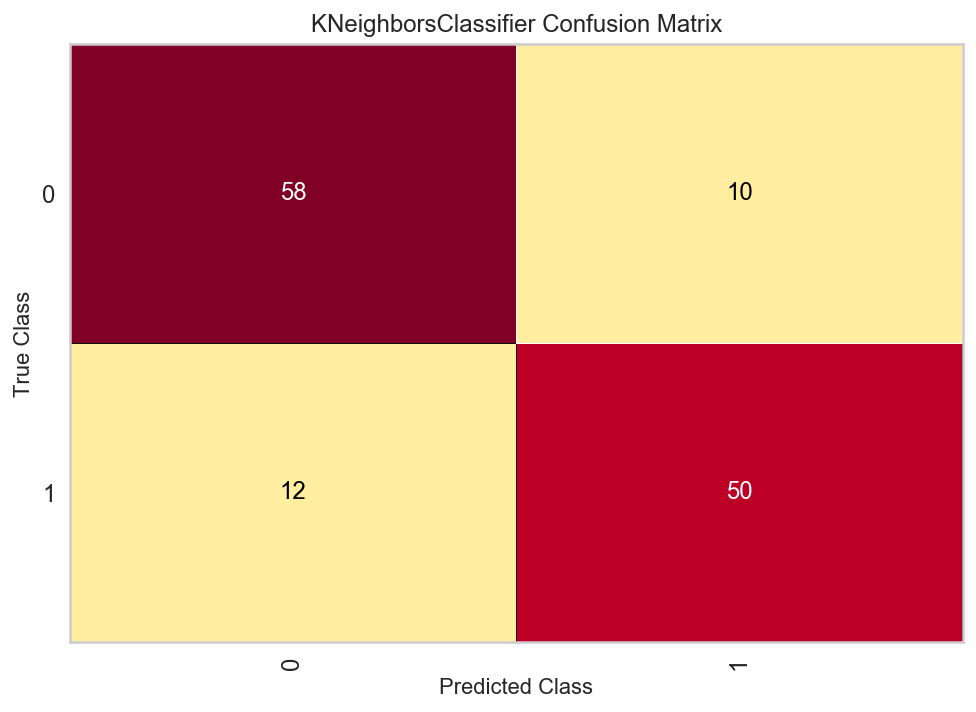

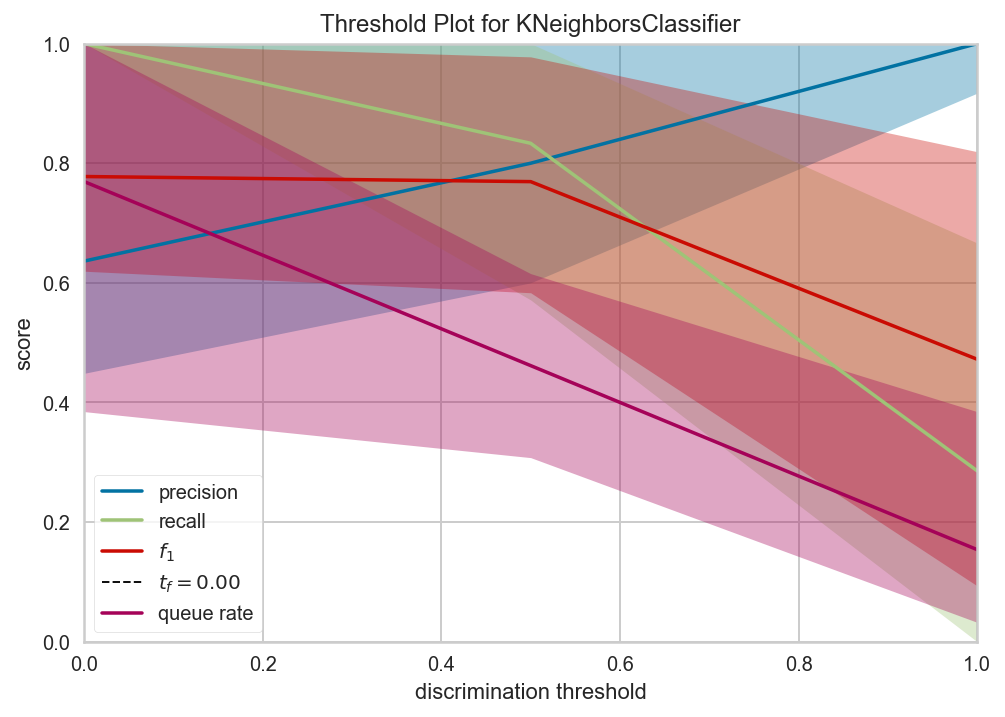

Test CV Score = 0.8461538461538461


In [24]:
scaler = [StandardScaler(), RobustScaler(), MaxAbsScaler(),MinMaxScaler()]

models = [
    #Standard Scaler,QuantileTransformer random_state=0
    
    
    
    #C=0.01,penalty='l1',solver='liblinear')

    Pipeline([
            ('std',StandardScaler()),
            ('mlp',MLPClassifier())
    ]),

    #Does identify positive more than comparison
    Pipeline([
            ('std',StandardScaler()),
            ('rfc',RandomForestClassifier())
    ]),


    #Above 3000 for both false positives
    Pipeline([
        ('std',StandardScaler()),
        ('reg',KNeighborsClassifier())
    ]),


]


afterwards = []

for model in models:
    print(model)
    model.fit(X_train,y_train)
    _ = confusion_matrix(model, X_test, y_test,is_fitted=True)
    visualizer = DiscriminationThreshold(model)
    visualizer.fit(X_test, y_test)        # Fit the data to the visualizer
    visualizer.show()  
    

    
    y_pred = model.predict(X_train)
    model_str = str(model[1])
    model_name = model_str[0:model_str.find('(',0)].strip()
    
    
    
    #print('Train CV Score = {x} '.format(x=cvs(model,X_train,y_train)[3]))
    print("Test CV Score = {x}".format(x=cvs(model,X_test,y_test)[3]))
    
    
    
    
    afterwards.append({'Model':model[1],'Transformer':model[0],
              'Test Model Score':cvs(model,X_test,y_test)[3],
              'F1 Score':f1_score(y_train,y_pred),'Precision Score':precision_score(y_train,y_pred),
              'Recall Score':recall_score(y_train,y_pred)})




In [25]:
pd.DataFrame(afterwards)

,Model,Transformer,Test Model Score,F1 Score,Precision Score,Recall Score
0,MLPClassifier(),StandardScaler(),1.000000,0.993890,0.995918,0.991870
1,"(DecisionTreeClassifier(max_features='auto', r...",StandardScaler(),1.000000,1.000000,1.000000,1.000000
2,KNeighborsClassifier(),StandardScaler(),0.846154,0.907216,0.920502,0.894309
